In [ ]:
import pandas as pd


In [ ]:
df_hist = pd.read_csv('/content/merged_historical_data.csv')

In [ ]:
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     3999 non-null   object 
 1   open          3999 non-null   float64
 2   high          3999 non-null   float64
 3   low           3999 non-null   float64
 4   close         3999 non-null   float64
 5   volume        3999 non-null   float64
 6   daily_return  3999 non-null   float64
 7   volatility    3999 non-null   float64
 8   log_return    3999 non-null   float64
 9   pair          3999 non-null   object 
dtypes: float64(8), object(2)
memory usage: 312.6+ KB


In [ ]:
df_hist.head()

,timestamp,open,high,low,close,volume,daily_return,volatility,log_return,pair,pct_change
0,2023-12-28,0.110125,0.321420,0.000000,0.102231,0.000000,-0.013357,1.136372,-0.013447,SOL_USDC,NaN
1,2023-12-29,0.102427,0.114405,0.293397,0.126286,0.000300,0.041883,0.100441,0.041030,SOL_USDC,0.235294
2,2023-12-30,0.122935,0.100604,0.298558,0.100826,0.000101,-0.037027,0.058902,-0.037729,SOL_USDC,-0.201602
3,2023-12-31,0.103158,0.091134,0.290862,0.100433,0.000101,-0.004506,0.057798,-0.004516,SOL_USDC,-0.003902
4,2024-01-01,0.100180,0.113549,0.301369,0.146012,0.000045,0.080551,0.082029,0.077472,SOL_USDC,0.453833


In [ ]:
df_hist['pair'].unique()

array(['SOL_USDC', 'BTC_DAI', 'LTC_USDT', 'BNB_USDT', 'ETH_USDC',
       'ETH_USDT', 'BTC_USDC', 'ETH_DAI'], dtype=object)

#ANALYSIS USING VOLUME

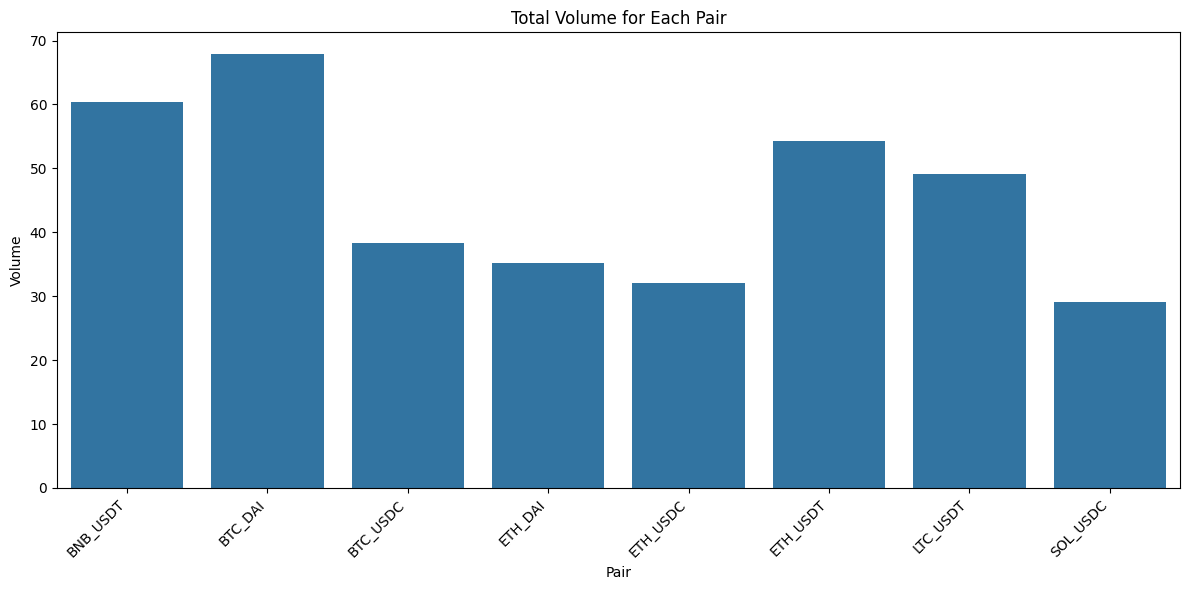

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group data by pair and sum volume
pair_volume = df_hist.groupby('pair')['volume'].sum().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x='pair', y='volume', data=pair_volume)
plt.title('Total Volume for Each Pair')
plt.xlabel('Pair')
plt.ylabel('Volume')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

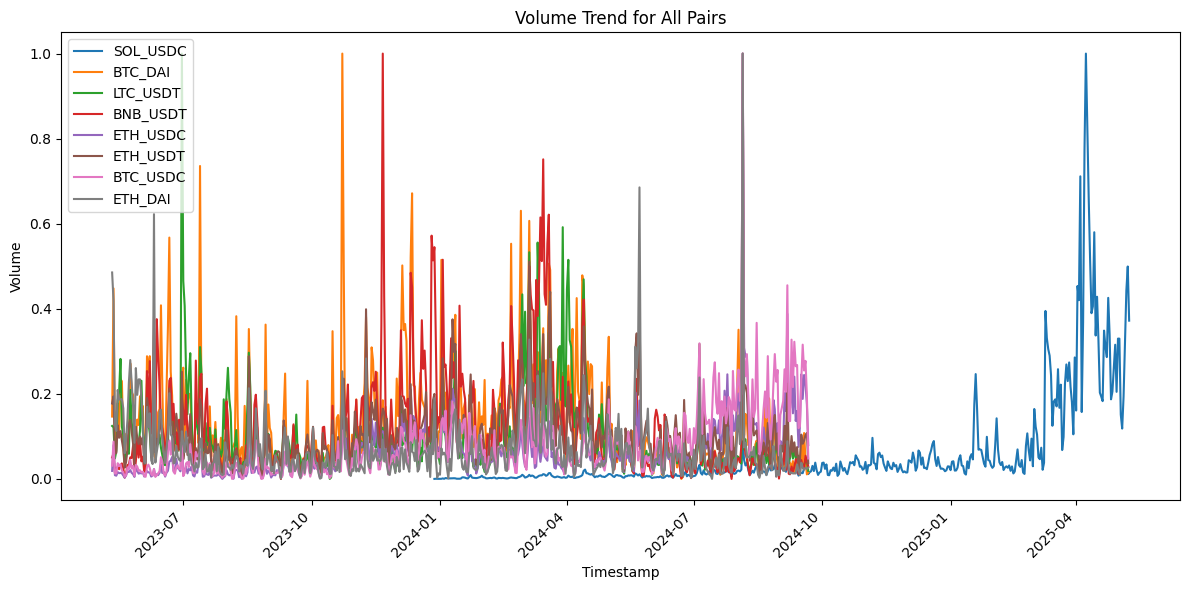

In [ ]:
# Convert 'timestamp' column to datetime if it's not already
df_hist['timestamp'] = pd.to_datetime(df_hist['timestamp'])

# Get unique pairs
unique_pairs = df_hist['pair'].unique()

# Create the plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Loop through each pair and plot with a different color
for pair in unique_pairs:
    sns.lineplot(x='timestamp', y='volume', data=df_hist[df_hist['pair'] == pair], label=pair)

plt.title('Volume Trend for All Pairs')
plt.xlabel('Timestamp')
plt.ylabel('Volume')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()  # Show legend to identify pairs
plt.tight_layout()
plt.show()

In [ ]:
# Pivot the DataFrame to have pairs as columns and volume as values
volume_by_pair = df_hist.pivot(index='timestamp', columns='pair', values='volume')

# Calculate the correlation matrix
correlation_matrix = volume_by_pair.corr()

# Print the correlation matrix
print(correlation_matrix)

pair      BNB_USDT   BTC_DAI  BTC_USDC   ETH_DAI  ETH_USDC  ETH_USDT  \
pair                                                                   
BNB_USDT  1.000000  0.562383  0.142349  0.349171  0.235078  0.620307   
BTC_DAI   0.562383  1.000000  0.224514  0.503109  0.294508  0.669239   
BTC_USDC  0.142349  0.224514  1.000000  0.306807  0.888831  0.544948   
ETH_DAI   0.349171  0.503109  0.306807  1.000000  0.395621  0.727650   
ETH_USDC  0.235078  0.294508  0.888831  0.395621  1.000000  0.653685   
ETH_USDT  0.620307  0.669239  0.544948  0.727650  0.653685  1.000000   
LTC_USDT  0.487674  0.521400  0.090520  0.421211  0.124370  0.553417   
SOL_USDC -0.112762  0.042695  0.838778  0.327911  0.800892  0.340167   

pair      LTC_USDT  SOL_USDC  
pair                          
BNB_USDT  0.487674 -0.112762  
BTC_DAI   0.521400  0.042695  
BTC_USDC  0.090520  0.838778  
ETH_DAI   0.421211  0.327911  
ETH_USDC  0.124370  0.800892  
ETH_USDT  0.553417  0.340167  
LTC_USDT  1.000000 -0.025327  


**High Correlation Between Same-Stablecoin Different-crypto-coin Pairs**

The correlation matrix shoes high correlation between Same-Stablecoin-Different_Crypto Pairs with USDC

BTC_USDC ↔ ETH_USDC: 0.888

BTC_USDC ↔ SOL_USDC: 0.838

ETH_USDC ↔ SOL_USDC: 0.801

Implies:
USDC trading volumes across different crypto assets move strongly together.

Caution:
Generally, hedging with USDC may not reduce exposure to market-wide volume shocks.

**Moderate Correlation Within the Same Coin Across Stablecoins**

BTC_DAI ↔ BTC_USDC: 0.225

ETH_DAI ↔ ETH_USDC: 0.396

ETH_DAI ↔ ETH_USDT: 0.728

Different stablecoin markets for the same asset behave differently, especially between DAI and USDC/USDT.

This divergence could offer hedging opportunities, e.g., use DAI where USDC moves with market flow.

**Low or Negative Correlation in Specific Pairs**

BNB_USDT ↔ SOL_USDC: -0.113

BTC_USDC ↔ LTC_USDT: 0.090

LTC_USDT ↔ SOL_USDC: -0.025

Some stablecoin-crypto pairs have independent volume behaviors.

SOL_USDC behaves differently than many other pairs — could be a candidate to diversify hedging or to study isolated market behaviors.



**ETH_USDT is a Volume Bellwether**
Correlated significantly with:

BTC_DAI (0.669)

ETH_DAI (0.728)

LTC_USDT (0.553)

ETH_USDC (0.654)

Interpretation:

ETH/USDT trading volume is a central driver of market volume dynamics.

Could serve as a reference benchmark for liquidity movement in hedging strategies.

#ANALYSIS USING VOLATILITY

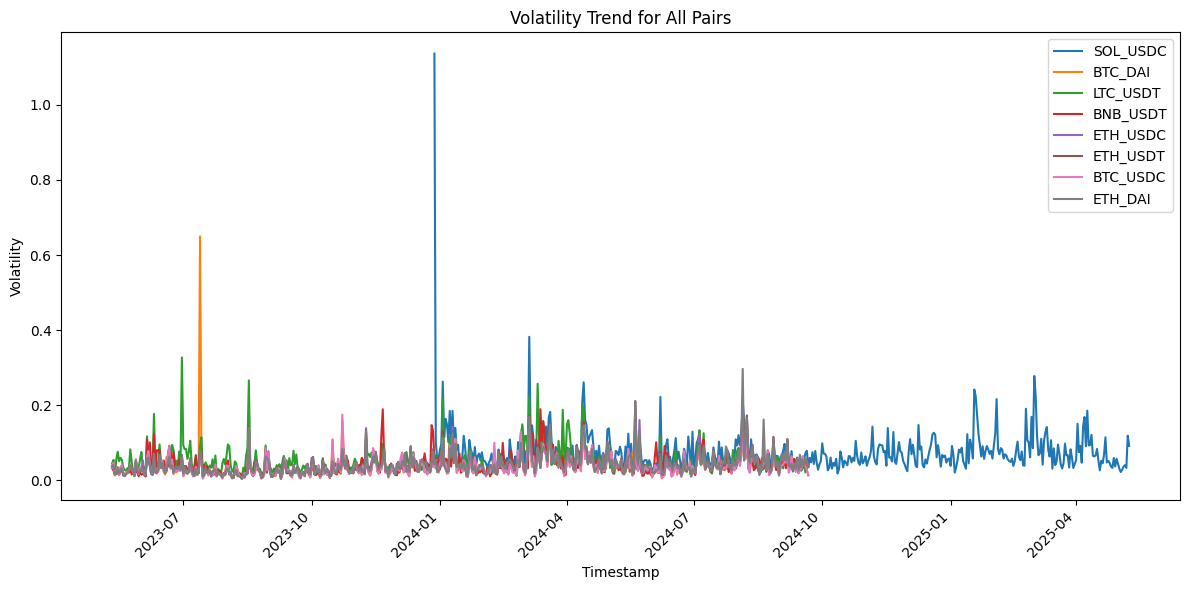

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the percentage change in closing price for each pair
df_hist['pct_change'] = df_hist.groupby('pair')['close'].pct_change()

# Convert 'timestamp' column to datetime if it's not already
df_hist['timestamp'] = pd.to_datetime(df_hist['timestamp'])

# Get unique pairs
unique_pairs = df_hist['pair'].unique()

# Create the plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Loop through each pair and plot with a different color
for pair in unique_pairs:
    sns.lineplot(x='timestamp', y='volatility', data=df_hist[df_hist['pair'] == pair], label=pair)

plt.title('Volatility Trend for All Pairs')
plt.xlabel('Timestamp')
plt.ylabel('Volatility')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()  # Show legend to identify pairs
plt.tight_layout()
plt.show()

In [ ]:
# Calculate average volatility for each pair
avg_volatility = df_hist.groupby('pair')['volatility'].mean()

# Sort by average volatility in descending order
ranked_volatility = avg_volatility.sort_values(ascending=False)

# Print the ranked volatility
print(ranked_volatility)

pair
SOL_USDC    0.077327
LTC_USDT    0.050722
ETH_USDC    0.042295
ETH_USDT    0.041926
ETH_DAI     0.041442
BNB_USDT    0.040722
BTC_DAI     0.038713
BTC_USDC    0.037430
Name: volatility, dtype: float64


***ANALYSIS BASED ON MEAN VOLATILITY***

**Most Stable Pair (Best for Hedging):**

BTC_USDC has the lowest volatility (0.037)

BTC_DAI is next (0.039)

**These are ideal pairs to hedge with because:**

Low price swings = lower risk

If you're trading BTC, hedging with USDC or DAI gives better stability

ETH Pairs Are Mid-Risk:
ETH_DAI, ETH_USDT, ETH_USDC → around 0.041-0.042

**These are fairly stable, good secondary choices for hedging if:**

You're holding ETH and want to hedge it

You want exposure to ETH but still reduce risk

Avoid SOL_USDC for Risk-Averse Hedging:
SOL_USDC has the highest volatility (0.077)

**It’s almost twice as volatile as BTC_USDC:**

Not ideal for low-risk hedging

Better used when you're okay with price swings, or doing speculative trades

LTC_USDT Also Quite Volatile (0.051)
Moderate risk

Better than SOL, but not the best choice for stable hedging



In [ ]:
# Pivot the DataFrame to have pairs as columns and volatility as values
volatility_by_pair = df_hist.pivot(index='timestamp', columns='pair', values='volatility')

# Calculate the correlation matrix
correlation_matrix = volatility_by_pair.corr()

# Print the correlation matrix
print(correlation_matrix)

pair      BNB_USDT   BTC_DAI  BTC_USDC   ETH_DAI  ETH_USDC  ETH_USDT  \
pair                                                                   
BNB_USDT  1.000000  0.444931  0.630583  0.657709  0.671494  0.679160   
BTC_DAI   0.444931  1.000000  0.655976  0.568260  0.581557  0.589591   
BTC_USDC  0.630583  0.655976  1.000000  0.803800  0.823076  0.830129   
ETH_DAI   0.657709  0.568260  0.803800  1.000000  0.966743  0.970975   
ETH_USDC  0.671494  0.581557  0.823076  0.966743  1.000000  0.995436   
ETH_USDT  0.679160  0.589591  0.830129  0.970975  0.995436  1.000000   
LTC_USDT  0.581842  0.466810  0.616655  0.626101  0.644843  0.653017   
SOL_USDC  0.410266  0.371826  0.405443  0.371215  0.401796  0.405887   

pair      LTC_USDT  SOL_USDC  
pair                          
BNB_USDT  0.581842  0.410266  
BTC_DAI   0.466810  0.371826  
BTC_USDC  0.616655  0.405443  
ETH_DAI   0.626101  0.371215  
ETH_USDC  0.644843  0.401796  
ETH_USDT  0.653017  0.405887  
LTC_USDT  1.000000  0.380788  


**INSIGHTS on volatility correlation**

If you're exposed to SOL, consider BTC_DAI, ETH_DAI, or even BNB_USDT.

Reason: Low volatility correlation → when SOL gets volatile, these stay relatively stable.

If you're in ETH and want to hedge outside the ETH family:

Don’t hedge with ETH_USDC/ETH_DAI – too correlated.

Consider BTC_DAI or BNB_USDT for better hedging behavior.

Avoid Switching Between Highly Correlated Pairs:
Don’t rotate between ETH_USDC, ETH_DAI, ETH_USDT — they offer no real volatility shield.

Same for BTC_DAI and BTC_USDC (correlation ~0.656) — similar reaction to market volatility.

#ANALYSIS FROM FUNDING RATE

In [ ]:
df_funding = pd.read_csv("/content/merged_funding_data.csv")

In [ ]:
df_funding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15414 entries, 0 to 15413
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   timestamp   15414 non-null  object 
 1   pair        15414 non-null  object 
 2   rate        15414 non-null  float64
 3   pair_clean  15414 non-null  object 
 4   quote       15414 non-null  object 
 5   rate_norm   15414 non-null  float64
dtypes: float64(2), object(4)
memory usage: 722.7+ KB


In [ ]:
df_funding.head(10)

,timestamp,pair,rate,pair_clean,quote,rate_norm
0,2023-05-13 16:00:00.026,SOL/USDT,0.000100,SOL_USDT_USDT,USDT,0.426183
1,2023-05-14 00:00:00.029,SOL/USDT,0.000077,SOL_USDT_USDT,USDT,0.414052
2,2023-05-14 08:00:00.010,SOL/USDT,0.000064,SOL_USDT_USDT,USDT,0.407534
3,2023-05-14 16:00:00.008,SOL/USDT,0.000068,SOL_USDT_USDT,USDT,0.409372
4,2023-05-15 00:00:00.006,SOL/USDT,0.000009,SOL_USDT_USDT,USDT,0.378360
5,2023-05-15 08:00:00.005,SOL/USDT,0.000065,SOL_USDT_USDT,USDT,0.407755
6,2023-05-15 16:00:00.008,SOL/USDT,0.000084,SOL_USDT_USDT,USDT,0.418027
7,2023-05-16 00:00:00.021,SOL/USDT,0.000100,SOL_USDT_USDT,USDT,0.426183
8,2023-05-16 08:00:00.000,SOL/USDT,0.000061,SOL_USDT_USDT,USDT,0.405528
9,2023-05-16 16:00:00.000,SOL/USDT,0.000100,SOL_USDT_USDT,USDT,0.426183


In [ ]:
df_funding['pair'].unique()

array(['SOL/USDT', 'LTC/USDT', 'BNB/USDT', 'ETH/USDC', 'BTC/USDT',
       'BNB/USDC', 'BTC/USDC', 'ETH/USDT'], dtype=object)

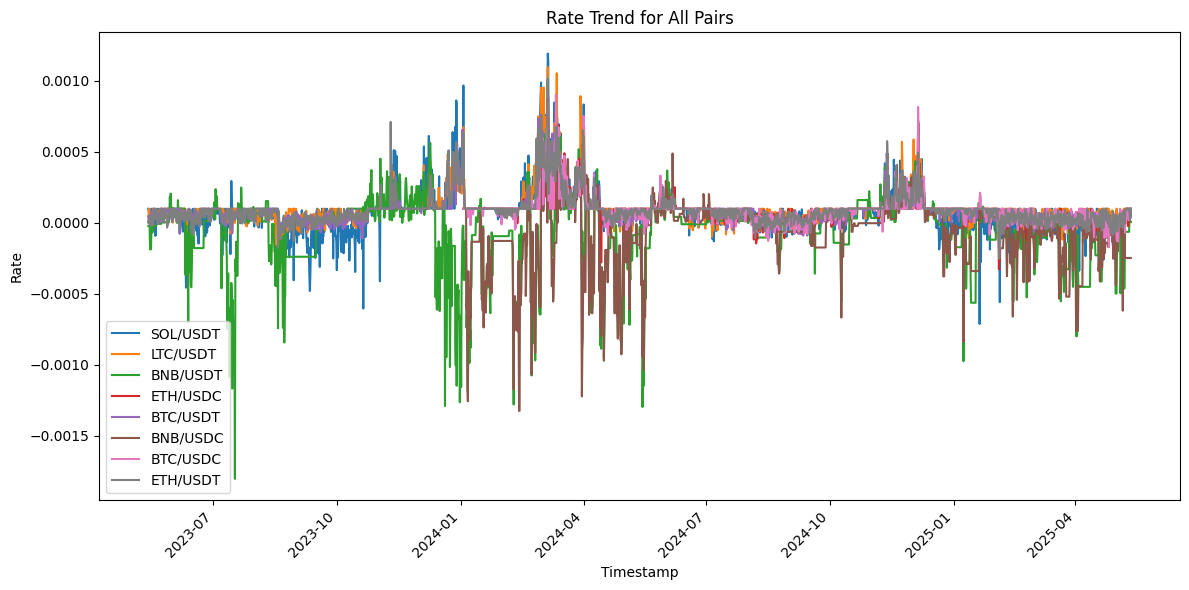

In [ ]:
# Convert 'timestamp' column to datetime if it's not already
df_funding['timestamp'] = pd.to_datetime(df_funding['timestamp'])

# Get unique pairs
unique_pairs = df_funding['pair'].unique()

# Create the plot
plt.figure(figsize=(12, 6))  # Adjust figure size as needed

# Loop through each pair and plot with a different color
for pair in unique_pairs:
    sns.lineplot(x='timestamp', y='rate', data=df_funding[df_funding['pair'] == pair], label=pair)

plt.title('Rate Trend for All Pairs')
plt.xlabel('Timestamp')
plt.ylabel('Rate')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend()  # Show legend to identify pairs
plt.tight_layout()
plt.show()

In [ ]:
# Pivot the DataFrame to have pairs as columns and rate as values
rate_by_pair = df_funding.pivot(index='timestamp', columns='pair', values='rate')

# Calculate the correlation matrix
correlation_matrix = rate_by_pair.corr()

# Print the correlation matrix
print(correlation_matrix)

pair      BNB/USDC  BNB/USDT  BTC/USDC  BTC/USDT  ETH/USDC  ETH/USDT  \
pair                                                                   
BNB/USDC  1.000000  0.812726  0.230679  0.211047  0.227571  0.203499   
BNB/USDT  0.812726  1.000000  0.340972  0.214929  0.338455  0.223864   
BTC/USDC  0.230679  0.340972  1.000000  0.867479  0.860712  0.789129   
BTC/USDT  0.211047  0.214929  0.867479  1.000000  0.784338  0.860819   
ETH/USDC  0.227571  0.338455  0.860712  0.784338  1.000000  0.847895   
ETH/USDT  0.203499  0.223864  0.789129  0.860819  0.847895  1.000000   
LTC/USDT  0.168670  0.209231  0.728179  0.814385  0.716608  0.837141   
SOL/USDT  0.180656  0.207651  0.724023  0.779850  0.725173  0.795758   

pair      LTC/USDT  SOL/USDT  
pair                          
BNB/USDC  0.168670  0.180656  
BNB/USDT  0.209231  0.207651  
BTC/USDC  0.728179  0.724023  
BTC/USDT  0.814385  0.779850  
ETH/USDC  0.716608  0.725173  
ETH/USDT  0.837141  0.795758  
LTC/USDT  1.000000  0.794766  


In [ ]:
# Calculate average rate for each pair
avg_rates = df_funding.groupby('pair')['rate'].mean()

# Print the average rates
print(avg_rates)

pair
BNB/USDC   -0.000072
BNB/USDT   -0.000066
BTC/USDC    0.000090
BTC/USDT    0.000086
ETH/USDC    0.000087
ETH/USDT    0.000091
LTC/USDT    0.000103
SOL/USDT    0.000077
Name: rate, dtype: float64


***Favorable Pairs for Hedging ***

(You Earn Funding)
Pair	Why It’s Good
BTC/USDC	You earn 0.009% per 8h → extra income while hedged.
BTC/USDT	Similar earning while hedging.
ETH/USDC	Slightly less, but still positive income.
ETH/USDT	You hedge AND get paid.
LTC/USDT	Highest funding income; hedge is profitable.
SOL/USDT	Moderate earnings while hedged.

**Hedging these pairs makes sense — you protect your downside risk and earn a small premium regularly.**

Unfavorable Pairs for Hedging (You Pay Funding)


Pair	Why It’s Costly
BNB/USDC	You pay 0.0072% every 8h → increases hedge cost.
BNB/USDT	Slightly less expensive, but still a drain over time.

If you short BNB/USDC or BNB/USDT to hedge BNB spot holdings, you’ll be paying continuously — this erodes your profit or increases your loss.



#TRADING VOLUME AND LIQUIDITY

In [ ]:
df_vol_liq = pd.read_csv("/content/merged_trading_volume_liquidity_data.csv")

In [ ]:
df_vol_liq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     3999 non-null   object 
 1   open          3999 non-null   float64
 2   high          3999 non-null   float64
 3   low           3999 non-null   float64
 4   close         3999 non-null   float64
 5   volume        3999 non-null   float64
 6   pair          3999 non-null   object 
 7   bid           3999 non-null   float64
 8   ask           3999 non-null   float64
 9   spread        3999 non-null   float64
 10  daily_return  3999 non-null   float64
 11  volatility    3999 non-null   float64
 12  log_return    3999 non-null   float64
dtypes: float64(11), object(2)
memory usage: 406.3+ KB


In [ ]:
# Calculate average spread for each pair
avg_spread = df_vol_liq.groupby('pair')['spread'].mean()

# Print the average spread per pair
print(avg_spread)

pair
BNB/USDT    0.118000
BTC/DAI     0.275610
BTC/USDC    0.009125
ETH/DAI     0.494826
ETH/USDC    0.494892
ETH/USDT    0.004000
LTC/USDT    0.640000
SOL/USDC    0.072545
Name: spread, dtype: float64


| Strategy Goal                    | Suggested Pairs             |
| -------------------------------- | --------------------------- |
| **Low-cost, frequent hedging**   | ETH/USDT, BTC/USDC          |
| **Mid-risk, less frequent**      | BNB/USDT, BTC/DAI, SOL/USDC |
| **Long-term hedge (watch cost)** | ETH/DAI, ETH/USDC, LTC/USDT |


# FINAL INSIGHTS

**COMPASRION ACROSS ALL ANALYTICS POINTS**

| Pair         | Spread | Volatility | Funding Rate | Spread Rank | Vol Rank | Funding Rank | 🏆Total Rank (Lower is Better) |
| ------------ | ------ | ---------- | ------------ | ----------- | -------- | --------- | ------------------------------ |
| **ETH/USDT** | 0.0040 | 0.04193    | 0.000091     | **1**       | **2**    | **2**     | 🥇 **5**                       |
| **BTC/USDC** | 0.0091 | 0.03743    | 0.000090     | **2**       | **1**    | **3**     | 🥈 **6**                       |
| **SOL/USDC** | 0.0725 | 0.07733    | 0.000077     | **4**       | **8**    | **6**     | 🎖️ **18**                     |
| **BNB/USDT** | 0.1180 | 0.04072    | -0.000066    | **5**       | **3**    | **8**     | 🎖️ **16**                     |
| **BTC/DAI**  | 0.2756 | 0.03871    | 0.000000     | **6**       | **2**    | **5**     | **13**                         |
| **ETH/DAI**  | 0.4948 | 0.04144    | -            | **7**       | **5**    | N/A       | **12+** (Missing rate)         |
| **ETH/USDC** | 0.4949 | 0.04230    | 0.000087     | **8**       | **6**    | **4**     | **18**                         |
| **LTC/USDT** | 0.6400 | 0.05072    | 0.000103     | **9**       | **7**    | **1**     | **17**                         |



## 📊 Evaluation Matrix of All Pairs

| Pair         | Volatility | Spread           | Funding Rate | Volume Correlation     | Notes                                 |
| ------------ | ---------- | ---------------- | ------------ | ---------------------- | ------------------------------------- |
| **BTC/USDC** | ✅ Lowest   | ✅ Tight          | ✅ Positive   | ❌ High with USDC pairs | Best overall, but less isolated       |
| **ETH/USDT** | ✅ Low      | ✅ Lowest         | ✅ Positive   | ✅ Market-wide lead     | Excellent across all metrics          |
| **BTC/DAI**  | ✅ Low      | ⚠️ Slightly wide | ⚪ Neutral    | ✅ Moderate             | Great hedge, good diversification     |
| **ETH/USDC** | ✅ Low      | ✅ Tight          | ✅ Positive   | ❌ High with USDC pairs | Ideal for ETH exposure                |
| **LTC/USDT** | ⚠️ Medium  | ❌ High           | ✅ Highest    | ✅ Independent          | Income-generating but riskier         |
| **SOL/USDC** | ❌ High     | ⚠️ Medium        | ⚪ Mixed      | ✅ Diverse              | High risk, not for conservative hedge |
| **SOL/USDT** | ❌ High     | ⚠️ Medium        | ✅ Moderate   | ✅ Less correlated      | Only for strategic diversification    |
| **BNB/USDC** | ✅ Low      | ⚠️ OK            | ❌ You Pay    | ✅ Diverse              | Avoid due to funding drain            |
| **BNB/USDT** | ✅ Low      | ⚠️ OK            | ❌ You Pay    | ✅ Diverse              | Same as above                         |


## ✅ Summary: Best Strategy Mix

| Goal                               | Recommended Pairs                         |
| ---------------------------------- | ----------------------------------------- |
| **Most Efficient & Stable Hedge**  | BTC/USDC, ETH/USDT                        |
| **Diversified Volatility Shield**  | BTC/DAI, SOL/USDT                         |
| **Income-Focused Hedging**         | ETH/USDC, LTC/USDT (with caution)         |
| **Isolated Volume Behavior**       | SOL/USDT, BTC/DAI                         |
| **Avoid for Conservative Hedging** | BNB/USDC, SOL/USDC (high cost/volatility) |


#NEXT THING IS ANALYSING ADDITIONAL DATA FOR FX RATES ETC AND ALSO ANALYSING SPECIFIC HEDGING STRATEGIES AND BEST COIN PAIR FOR EACH STRATEGY

    1. Delta Hedging with Perpetual Futures
        ◦ Using inverse perpetual contracts to offset stablecoin peg risk
        ◦ Measuring funding rate impact on strategy profitability
    2. Options-Based Strategies
        ◦ Put options for downside protection
        ◦ Collar strategies (put + call) for bounded risk
    3. Diversification Across Stablecoin Types
        ◦ Portfolio allocation across fiat-backed, crypto-backed, and algorithmic stablecoins
        ◦ Correlation analysis during stress periods
    4. Liquidity Pool Hedging
        ◦ Using AMM positions as partial hedges
        ◦ Fee income vs. impermanent loss analysis
    5. Cross-Chain Hedging
        ◦ Analyzing effectiveness of multi-chain deployment
        ◦ Risk mitigation through blockchain diversification